**Summary**

Hello, This project consists of a neural network that is being used in order to detect images of chess pieces and classify it as either a 'bishop', 'pawn', 'knight', 'king' or 'queen'

In this project, I've utilised a dataset from kaggle that contains a variety of chess pieces from the website Chess.com. For this reason, the project's goal is to be able to classify a given digital chess piece (probably from chess.com) into their respective class.



In [ ]:
import os
import zipfile
import tensorflow as tf
import random
from shutil import copy2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Run the given code snippet in order to download the dataset 

The dataset contains 6 classes corresponding to each piece, and contains a total of 517 images


In [ ]:
#Run to Download the Zip File containing the images
!wget -O ChessFile.zip https://www.dropbox.com/s/le5xf56zcmxs6uh/ihlded.zip?dl=0

The code snippet below unzips the file

In [ ]:
zip_ref = "/content/ChessFile.zip"
zip_ref2 = zipfile.ZipFile(zip_ref,'r')
zip_ref2.extractall("ChessProject")

zip_ref2.close()

Here are 2 functions that handle the data splitting and directory creation

When splitting the data, we use a ratio such that 80% of the data goes to the training directory, whereas 20% go to the validation directory


In [ ]:
def create_directories(dir):
  tr = os.path.join(dir,"training")
  os.makedirs(tr,exist_ok=True)
  va = os.path.join(dir,"validation")
  b = ["rook","queen","pawn","knight","bishop","king"]
  for a in b:
    path1 = os.path.join(tr,a)
    path2 = os.path.join(va,a)
    os.makedirs(path1,exist_ok=True)
    os.makedirs(path2,exist_ok=True)




In [ ]:
def split_data(SOURCE_DIR,TRAINING_DIR,VALIDATION_DIR):
  k = os.listdir(SOURCE_DIR)
  a = random.sample(k,len(k))
  count = 0
  #the 0.8, shows that 80% of the data goes to the trianing directory
  limit = len(a) * 0.8
  for image in a:
    if(count<=limit):
      copy2(os.path.join(SOURCE_DIR,image),TRAINING_DIR)
      count+=1
    else:
      copy2(os.path.join(SOURCE_DIR,image),VALIDATION_DIR)


In [ ]:

create_directories("/content")
split_data("/content/ChessProject/data/queen","/content/training/queen","/content/validation/queen")
split_data("/content/ChessProject/data/rook","/content/training/rook","/content/validation/rook")
split_data("/content/ChessProject/data/bishop","/content/training/bishop","/content/validation/bishop")
split_data("/content/ChessProject/data/knight","/content/training/knight","/content/validation/knight")
split_data("/content/ChessProject/data/pawn","/content/training/pawn","/content/validation/pawn")
split_data("/content/ChessProject/data/king","/content/training/king","/content/validation/king")

Run this code, to see some of the images that will be used during Training(3 images of each class should've been printed)


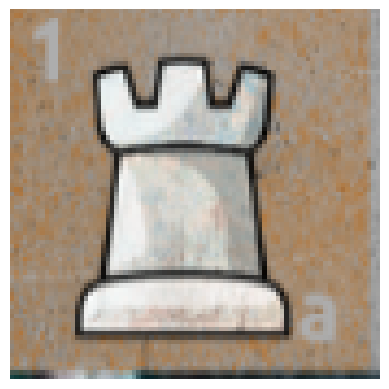

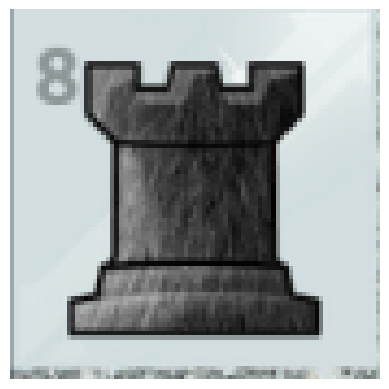

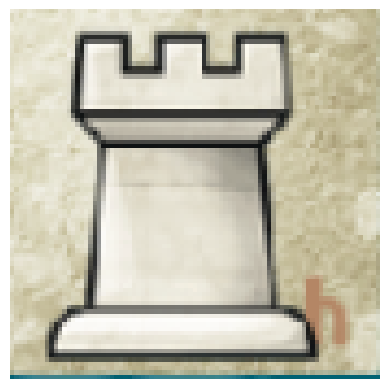

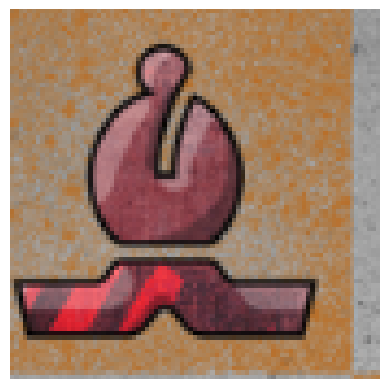

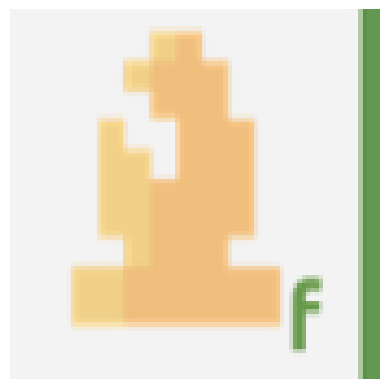

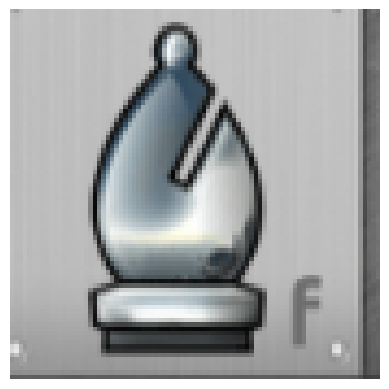

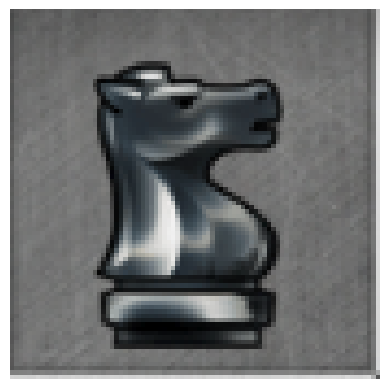

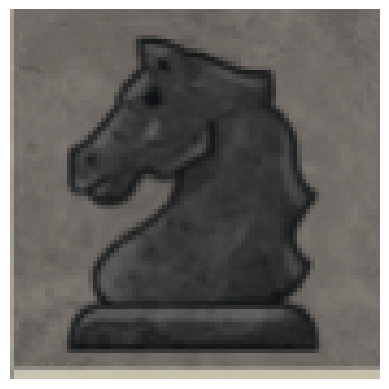

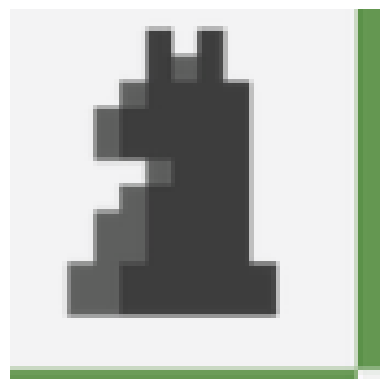

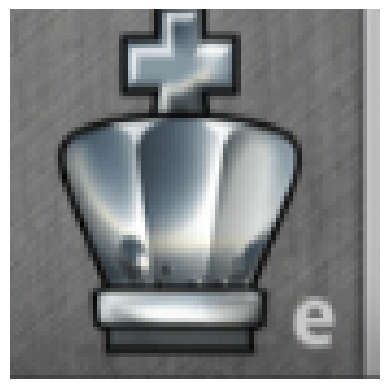

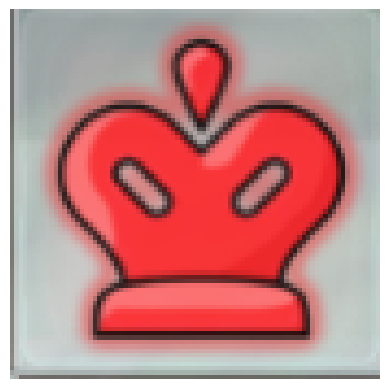

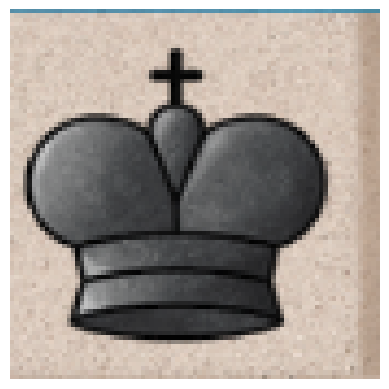

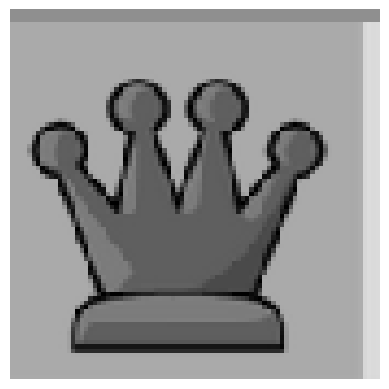

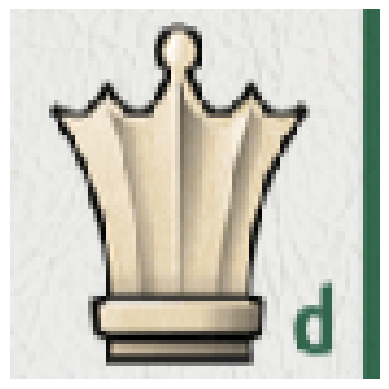

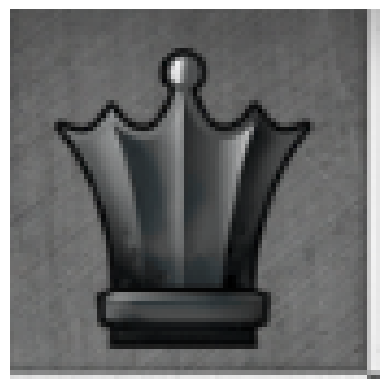

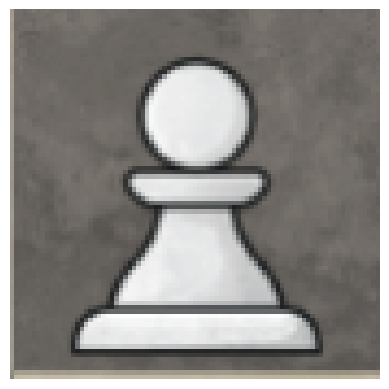

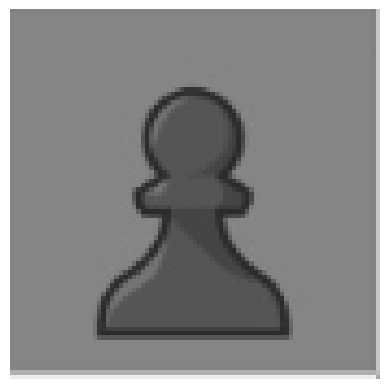

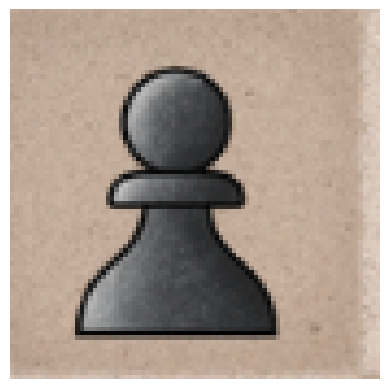

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


fig.set_size_inches(ncols * 4, nrows * 4)
rookar = os.listdir("/content/training/rook")
bishopar = os.listdir("/content/training/bishop")
knightar = os.listdir("/content/training/knight")
kingar = os.listdir("/content/training/king")
queenar = os.listdir("/content/training/queen")
pawnar = os.listdir("/content/training/pawn")
directoriess = [("/content/training/rook"),("/content/training/bishop"),("/content/training/knight"),("/content/training/king"),("/content/training/queen"),("/content/training/pawn")]
for directory in directoriess:
    # Get the list of image file names using os.listdir()
    image_files = os.listdir(directory)
    count = 0
    # Loop through the image files
    for image_file in image_files:
        if(count==3):
          break
        # Load the image using PIL (Python Imaging Library)
     
        image_path = os.path.join(directory, image_file)
        image = Image.open(image_path)

        # Create a new figure and plot the image
        plt.figure()
        plt.imshow(image)
        count=count+1
        plt.axis('off')  # Remove the axes and ticks
        






As the given dataset is quite small, about 517 images where only 400 of them pertain to training, I've augmented the images using the ImageDataGenerator in order to avoid overfitting and also virtually increase the size of the dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      brightness_range = (0.5,1.5),
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory("/content/training",target_size=(85,85),class_mode="categorical",batch_size=16)
validation_generator = train_datagen.flow_from_directory("/content/validation",target_size=(85,85),class_mode="categorical",batch_size=16)


The model at hand uses 3 convolutional layers in order to extract features of the data, followed by Pooling. Batch Normalization is done after each convolution in order to accelerate convergence. Once the preprocessing is done, the pixels are flattened and passed into the Neural Network. It is then followed by three layers of Neurons with 'relu' activation, followed by a final dense layer with a softmax activation corresponding to the output

In [ ]:
import tensorflow as tf
from keras import regularizers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(85,85,3)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(6,activation='softmax')
    
])
model.summary()


Compiling the model with Categorical Crossentropy, and optimizing with adam, And then fitting the model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_generator,epochs=100,steps_per_epoch=27,validation_data=validation_generator)


This section allows you to upload an image of your choice. The model takes in this image and provides its best guess as to what piece it is.

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(85, 85))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  arrr = np.where(classes[0]==classes[0].max())
  maxind = arrr[0]
  if maxind==0:
    print(fn + " is a bishop")
  elif maxind==1:
    print(fn + " is a king")
  elif maxind==2:
    print(fn + " is a knight")
  elif maxind==3:
    print(fn + " is a pawn")
  elif maxind==4:
    print(fn + "is a queen")
  elif maxind==5:
    print(fn + "is a rook")
  else:
    print("unknown")
